<a href="https://colab.research.google.com/github/ucfilho/marquesgabi_paper_fev_2021/blob/main/defesa/PSD_histogram_BEST_sample_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import zipfile
#import random
from random import randint
from PIL import Image
import re
from sklearn.model_selection import train_test_split
#import scikit-image
import skimage
import sklearn
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from sklearn.metrics import r2_score
from google.colab import files

In [2]:
Repetir = 40

In [3]:
# New version change routine inside MarquesGabi_Routines
# Try to improve segmentation 
# New routine is called Segment_Filter_revisited_One... Two,Three, etc
# this exemple threshold 0.4


In [4]:
#!pip install mahotas

In [5]:
def BlackWhite(Transfere,Size):

  img_name=[]
  xw=[]
  ww=[]

  with zipfile.ZipFile(Transfere, "r") as f:
    for name in f.namelist():
      img_name.append(name)
      #xw.append(cv2.imread(name))
      xw.append(cv2.resize(cv2.imread(name),(Size,Size)))

  nrow=len(img_name)
  ncol=Size*Size
  pw=np.zeros((nrow,ncol))
  #pw=[]
  for i in range(nrow):
    ww.append(cv2.cvtColor(np.array(xw[i]), cv2.COLOR_BGR2GRAY))
    pw[i,:]=ww[i].ravel()
  return ww,img_name

In [6]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado

Transfere='Fotos_Grandes_3cdAmostra.zip' 
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

Cloning into 'Doutorado'...
remote: Enumerating objects: 464, done.
remote: Counting objects: 100% (214/214), done.
remote: Compressing objects: 100% (213/213), done.
remote: Total 464 (delta 102), reused 0 (delta 0), pack-reused 250
Receiving objects: 100% (464/464), 203.28 MiB | 13.64 MiB/s, done.
Resolving deltas: 100% (219/219), done.
/content/Doutorado


In [7]:
labels =[]
with zipfile.ZipFile(Transfere, "r") as f:
  for f in f.namelist():
    labels.append(f)
print(labels)

['Fotos_Grandes-3cdAmostra/Q6-8-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-5-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-7-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-8-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-3-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-7-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-4-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-9-5.jpg', 'Fotos_Grandes-3cdAmostra/Q6-2-5.jpg', 'Fotos_Grandes-3cdAmostra/Q6-8-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-9-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-1-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-6-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-3-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-1-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-6-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-4-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-7-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-2-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-9-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-1-5.jpg', 'Fotos_Grandes-3cdAmostra/Q6-6-5.jpg', 'Fotos_Grandes-3cdAmostra/Q6-2-1.jpg', 'Fotos_Grandes-3cdAmostra/Q6-5-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-4-1.jpg', 'Fotos_Grandes-3cdAmostr

In [8]:
Size=1200 # tamanho da foto
ww,img_name=BlackWhite(Transfere,Size) #Pegamos a primeira foto Grande
# this is the big image we want to segment 
# ww[0], change it if you want to segment another picture

In [9]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines

Cloning into 'MarquesGabi_Routines'...
remote: Enumerating objects: 201, done.
remote: Counting objects: 100% (201/201), done.
remote: Compressing objects: 100% (198/198), done.
remote: Total 201 (delta 86), reused 3 (delta 1), pack-reused 0
Receiving objects: 100% (201/201), 211.75 MiB | 13.09 MiB/s, done.
Resolving deltas: 100% (86/86), done.
Checking out files: 100% (52/52), done.
/content/Doutorado/MarquesGabi_Routines


In [10]:
from Segment_Filter_Revival import Segmenta  # got image provided segmented

In [11]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines

Cloning into 'MarquesGabi_Routines'...
remote: Enumerating objects: 201, done.
remote: Counting objects: 100% (201/201), done.
remote: Compressing objects: 100% (199/199), done.
remote: Total 201 (delta 86), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (201/201), 211.75 MiB | 13.72 MiB/s, done.
Resolving deltas: 100% (86/86), done.
Checking out files: 100% (52/52), done.
/content/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines


In [12]:
# leitura dos dados
df=pd.read_excel("FotosTreinoRede.xlsx")
y = df['y']
df.drop(['Unnamed: 0','y'], axis='columns', inplace=True)

In [13]:
X =np.array(df.copy())/255.0 


X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.30, shuffle=True, random_state=42)

In [14]:
Img_Size = 28

In [15]:
# helper
def ynindicator(Y):
  N = len(Y)
  K = len(set(Y))
  I = np.zeros((N, K))
  I[np.arange(N), Y] = 1
  return I

def yback(Y_test):
  nrow, ncol = Y_test.shape
  y_class = np.zeros(nrow,dtype=int)
  y_resp = Y_test
  for k in range(nrow):
    for kk in range(K):
      if(y_resp[k,kk] == 1):
        y_class[k] = kk
  Y_test = y_class.copy()
  return Y_test

X_train = np.array(X_train)
Y_train = np.array(Y_train)
K = len(set(Y_train))

X_train = X_train.reshape(-1, Img_Size, Img_Size, 1) / 255.0
Y_train = Y_train.astype(np.int32)
Y_train = ynindicator(Y_train)

X_test = np.array(X_test )
Y_test = np.array(Y_test)
X_test = X_test.reshape(-1, Img_Size, Img_Size, 1) / 255.0
Y_test = Y_test.astype(np.int32)
Y_test = ynindicator(Y_test)

# the model will be a sequence of layers

Description = '3 layers of Convolution: 64, 128, 256 '
N1 = 20
N2 = 20

# make the CNN
model = Sequential()
model.add(Conv2D(input_shape=(Img_Size, Img_Size, 1), filters=64, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=128, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=256, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(units=N1))
model.add(Dropout(0.2))
model.add(Dense(units=N2))
model.add(Activation('relu'))
#model.add(Dropout(0.2))
model.add(Dense(units=K))
model.add(Activation('softmax'))


# list of losses: https://keras.io/losses/
# list of optimizers: https://keras.io/optimizers/
# list of metrics: https://keras.io/metrics/
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [16]:
# training the model
r = model.fit(X_train, Y_train, validation_data=(X_test,Y_test), 
              epochs=200, batch_size=32)

Epoch 1/200
11/11 [==============================] - 3s 148ms/step - loss: 0.7087 - accuracy: 0.6880 - val_loss: 0.6929 - val_accuracy: 0.5102
Epoch 2/200
11/11 [==============================] - 1s 124ms/step - loss: 0.3366 - accuracy: 0.8397 - val_loss: 0.6929 - val_accuracy: 0.5102
Epoch 3/200
11/11 [==============================] - 1s 124ms/step - loss: 0.2234 - accuracy: 0.9155 - val_loss: 0.6934 - val_accuracy: 0.5102
Epoch 4/200
11/11 [==============================] - 1s 126ms/step - loss: 0.1598 - accuracy: 0.9359 - val_loss: 0.6942 - val_accuracy: 0.5102
Epoch 5/200
11/11 [==============================] - 1s 125ms/step - loss: 0.1807 - accuracy: 0.9300 - val_loss: 0.6949 - val_accuracy: 0.5102
Epoch 6/200
11/11 [==============================] - 1s 127ms/step - loss: 0.1177 - accuracy: 0.9563 - val_loss: 0.6953 - val_accuracy: 0.5102
Epoch 7/200
11/11 [==============================] - 1s 125ms/step - loss: 0.0661 - accuracy: 0.9796 - val_loss: 0.6959 - val_accuracy: 0.5102

In [17]:
Y_test = yback(Y_test)

In [18]:
# pred_test= model.predict_classes(X_test)
pred_test = np.argmax(model.predict(X_test), axis=-1)

data = {'y_true': Y_test,'y_predict': pred_test}  # este dado esta no formato de dicionario

df = pd.DataFrame(data, columns=['y_true','y_predict'])


confusion_matrix = pd.crosstab(df['y_true'], df['y_predict'], rownames=['Actual'], colnames=['Predict'])
print(confusion_matrix)

y_true = df['y_true']
y_pred = df['y_predict']

  
METRICS=sklearn.metrics.classification_report(y_true, y_pred)

Predict   0   1
Actual         
0        71   1
1         4  71


In [19]:
print(METRICS)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97        72
           1       0.99      0.95      0.97        75

    accuracy                           0.97       147
   macro avg       0.97      0.97      0.97       147
weighted avg       0.97      0.97      0.97       147



In [20]:
pred_test

array([1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1])

In [21]:
Sample3 =[0, 3, 9] # 
# [2, 5, 17] sample 7---  [4,13,25] sample 3----[0, 3, 9] sample 8

for i in range(Repetir):
  k = 0
  for i in Sample3:
    img=ww[i]
    if( k > 0):
      df_old = df_ann.copy()
    df_ann=Segmenta(img)
    if(k > 0):
      df_ann = pd.concat( [df_ann, df_old], ignore_index = True)
    k = k + 1
#df_ann = df.copy

df_teste = np.array(df_ann)
names = df_ann.columns
df_teste = pd.DataFrame(df_teste,columns=names)
Width = df_ann['Width']
#del df_ann['Width']
names = df_ann.columns
del df_ann['Width']
result = np.array(df_ann)
result = result.reshape(-1, Img_Size, Img_Size, 1) / 255.0
prediction= np.argmax(model.predict(result), axis=-1)

In [22]:
df_ann

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,42.641865,42.465183,42.859528,44.097721,45.826057,45.747047,46.587597,45.501945,45.140079,43.357803,44.987873,48.822712,51.373055,55.452621,63.249763,69.837860,75.613495,77.545898,77.867760,76.774422,76.958290,80.299850,80.970367,77.578758,74.985512,75.114784,76.592476,79.420792,43.449436,43.871273,44.845703,46.751766,48.517307,47.202415,43.822716,42.126911,40.734375,44.368614,46.765541,49.668697,...,89.484161,90.497284,92.345947,96.022217,97.751770,98.977882,102.457443,102.817162,103.530807,103.655464,102.732391,105.249054,67.771568,64.180901,61.840820,60.574650,61.159721,62.592697,66.170471,68.134705,70.486855,71.580734,72.217499,73.185951,73.763512,74.208618,76.961090,81.273193,84.782928,87.390785,88.889381,93.016006,96.335136,98.083176,98.525475,100.797523,102.638290,102.725868,101.952698,102.184357
1,55.038788,67.304008,76.906548,83.868126,90.964622,93.526932,92.922050,93.312798,92.689850,91.086891,95.615967,98.578613,94.697906,87.136711,88.145447,88.156639,89.000206,90.487556,95.241196,101.625656,112.170609,122.498474,120.817825,70.349937,44.659222,46.184185,42.563431,42.791145,52.133358,58.824287,71.952530,82.712502,85.976715,89.902763,93.148071,93.680107,91.451111,91.154358,96.298470,99.991051,...,1.654430,1.708881,1.717193,1.739038,2.034259,3.500399,3.566945,3.759603,6.289414,17.461878,33.581543,46.299107,9.953700,10.926475,9.786616,9.914379,20.561138,42.702007,60.786400,69.629601,74.325424,72.319992,60.896263,39.163620,14.198625,2.511162,2.571847,2.573126,1.149768,0.392029,0.379562,0.507539,0.920188,2.409558,1.701209,1.565880,2.671426,3.717619,4.763280,6.259577
2,62.335110,60.541573,64.570274,82.686829,102.967010,114.915306,118.543060,113.374855,102.548210,99.936890,99.812386,98.094360,97.045937,88.267723,105.736618,115.103844,118.333679,110.855484,102.931183,95.237335,87.275345,81.924232,72.461594,56.556946,47.303490,46.407841,46.914936,47.204845,62.754974,61.188850,68.294006,88.675056,99.947731,104.429733,115.748344,117.984184,103.105965,97.413223,100.547958,102.490677,...,80.943207,84.674370,84.475227,83.122139,76.381973,68.008369,66.871223,67.405670,66.523773,65.129890,66.749458,68.022568,33.120403,32.464439,33.388245,36.259098,39.690247,43.605923,44.502632,45.509888,45.146877,44.771530,48.894287,54.036957,58.012833,60.584229,62.085564,68.238701,75.028275,81.184143,83.289917,83.875946,74.476967,67.482239,67.092690,67.368462,66.801537,66.086678,66.923553,67.383713
3,42.183331,42.733231,44.714104,46.367413,41.903812,33.953552,40.239235,44.236259,46.968857,49.421825,67.061317,78.650864,78.108505,74.948334,72.239555,68.146660,71.531822,77.347748,82.242844,85.254425,84.978416,81.963852,77.946640,81.201828,85.522049,84.851410,84.608452,86.458382,41.738014,42.625038,46.651180,45.535229,43.588581,42.916035,41.757992,43.748001,46.858318,48.978416,65.066635,80.384094,...,74.521622,83.280685,90.972786,93.573914,89.660210,89.507385,91.007858,94.035805,92.528847,92.576660,96.178230,110.510239,91.132851,92.013275,93.405357,93.626205,94.779778,94.597198,89.379303,86.991165,79.801773,52.640976,45.567860,42.645336,40.483150,38.597935,43.597401,55.816982,72.470184,84.994995,90.800606,89.940796,85.364326,84.808044,86.989159,90.366982,87.993828,88.188316,93.869591,109.116905
4,49.639820,53.645512,58.091908,60.915020,62.577427,61.017242,58.899738,59.747734,59.690666,58.255287,57.959465,56.806046,52.557152,43.632351,38.467381,40.120716,43.465595,43.482311,40.753067,41.465599,40.044270,40.595020,39.189514,39.471825,41.622581,42.752182,40.743645,37.739552,55.185776,56.588802,57.993423,59.550045,59.212799,57.333336,53.566402,54.254398,56.238575,58.047291,59.216709,57.632359,...,81.779022,81.494225,81.927116,84.454399,85.186317,80.352180,73.899025,70.372620,74.241417

In [23]:
df_teste.shape # por que esta saindo 100 ???????

(150, 785)

In [24]:
#df_ann

In [25]:
img_graos = []
Width_new = []
k = 0
for i in prediction:
  if( i == 0):
    img_graos.append(df_teste.iloc[k,:])
    Width_new.append(Width.iloc[k])

  k = k +1

img_graos = pd.DataFrame(img_graos, columns=names )


In [26]:
img_graos.shape

(72, 785)

In [27]:
prediction

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1])

In [28]:
img_graos.shape

(72, 785)

In [29]:
Width=np.array(Width_new)

In [30]:
!git clone https://github.com/ucfilho/marquesgabi_paper_fev_2021
%cd marquesgabi_paper_fev_2021

from Get_PSDArea_Revival import PSDArea
from histogram_fev_2021 import PSD
#from GetBetterSegm import GetBetter

Cloning into 'marquesgabi_paper_fev_2021'...
remote: Enumerating objects: 831, done.
remote: Counting objects: 100% (592/592), done.
remote: Compressing objects: 100% (590/590), done.
remote: Total 831 (delta 386), reused 0 (delta 0), pack-reused 239
Receiving objects: 100% (831/831), 6.23 MiB | 10.49 MiB/s, done.
Resolving deltas: 100% (523/523), done.
/content/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021


In [31]:
#https://github.com/marquesgabi/Doutorado/blob/master/Amostra7.csv
#!git clone https://github.com/ucfilho/marquesgabi_out_2020
!git clone https://github.com/marquesgabi/Doutorado
#%cd marquesgabi_out_2020
%cd Doutorado
PSD_imageJ = 'Amostra7.csv' 
#PSD_new = pd.read_csv(PSD_imageJ,sep=';')
#encoding='utf8'

#PSD_imageJ = 'Areas_ImageJ.csv'
PSD_new = pd.read_csv(PSD_imageJ)
print(PSD_new.head(3))
''''''

Cloning into 'Doutorado'...
remote: Enumerating objects: 464, done.
remote: Counting objects: 100% (214/214), done.
remote: Compressing objects: 100% (213/213), done.
remote: Total 464 (delta 102), reused 0 (delta 0), pack-reused 250
Receiving objects: 100% (464/464), 166.11 MiB | 14.04 MiB/s, done.
Resolving deltas: 100% (225/225), done.
Checking out files: 100% (92/92), done.
/content/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/Doutorado
     ;Area
0  1;1.387
1  2;1.626
2  3;1.336


''

In [32]:
Area_All, Diameter_All=PSDArea(img_graos) 

In [33]:
Width.shape

(72,)

In [34]:
img_graos.shape

(72, 785)

In [35]:
img_graos.head()

,Width,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,135.0,42.641865,42.465183,42.859528,44.097721,45.826057,45.747047,46.587597,45.501945,45.140079,43.357803,44.987873,48.822712,51.373055,55.452621,63.249763,69.837860,75.613495,77.545898,77.867760,76.774422,76.958290,80.299850,80.970367,77.578758,74.985512,75.114784,76.592476,79.420792,43.449436,43.871273,44.845703,46.751766,48.517307,47.202415,43.822716,42.126911,40.734375,44.368614,46.765541,...,89.484161,90.497284,92.345947,96.022217,97.751770,98.977882,102.457443,102.817162,103.530807,103.655464,102.732391,105.249054,67.771568,64.180901,61.840820,60.574650,61.159721,62.592697,66.170471,68.134705,70.486855,71.580734,72.217499,73.185951,73.763512,74.208618,76.961090,81.273193,84.782928,87.390785,88.889381,93.016006,96.335136,98.083176,98.525475,100.797523,102.638290,102.725868,101.952698,102.184357
3,194.0,42.183331,42.733231,44.714104,46.367413,41.903812,33.953552,40.239235,44.236259,46.968857,49.421825,67.061317,78.650864,78.108505,74.948334,72.239555,68.146660,71.531822,77.347748,82.242844,85.254425,84.978416,81.963852,77.946640,81.201828,85.522049,84.851410,84.608452,86.458382,41.738014,42.625038,46.651180,45.535229,43.588581,42.916035,41.757992,43.748001,46.858318,48.978416,65.066635,...,74.521622,83.280685,90.972786,93.573914,89.660210,89.507385,91.007858,94.035805,92.528847,92.576660,96.178230,110.510239,91.132851,92.013275,93.405357,93.626205,94.779778,94.597198,89.379303,86.991165,79.801773,52.640976,45.567860,42.645336,40.483150,38.597935,43.597401,55.816982,72.470184,84.994995,90.800606,89.940796,85.364326,84.808044,86.989159,90.366982,87.993828,88.188316,93.869591,109.116905
4,150.0,49.639820,53.645512,58.091908,60.915020,62.577427,61.017242,58.899738,59.747734,59.690666,58.255287,57.959465,56.806046,52.557152,43.632351,38.467381,40.120716,43.465595,43.482311,40.753067,41.465599,40.044270,40.595020,39.189514,39.471825,41.622581,42.752182,40.743645,37.739552,55.185776,56.588802,57.993423,59.550045,59.212799,57.333336,53.566402,54.254398,56.238575,58.047291,59.216709,...,81.779022,81.494225,81.927116,84.454399,85.186317,80.352180,73.899025,70.372620,74.241417,74.597687,69.760536,67.134399,45.521595,45.573868,42.537601,45.037868,49.293514,54.452271,59.155914,61.633423,61.816891,62.780800,66.538849,70.185776,70.087112,69.529602,67.212448,69.269333,77.238220,80.697418,83.164093,87.010483,86.568718,79.444809,71.216003,67.762138,74.024887,75.230225,70.655823,68.743645
9,189.0,102.832649,108.207130,112.294937,90.657066,53.397808,49.647461,48.334705,47.550072,37.233192,18.654322,12.640604,16.251030,21.019205,22.459534,22.655693,23.149521,24.801100,24.342936,25.853226,26.720163,26.497944,59.318245,93.995888,110.322357,116.085052,116.312752,107.853226,108.923180,101.268852,100.300423,82.912216,57.290810,57.378597,54.039783,50.930042,50.013721,37.545956,21.096022,16.945129,...,78.975311,79.493828,80.041153,72.293556,55.668037,47.341564,48.379974,48.917698,50.524010,51.706451,57.984913,70.731133,97.304527,82.017838,60.086426,56.980797,58.764061,59.729763,56.957474,58.995888,59.857338,67.245544,85.082306,98.305893,88.812080,85.552811,83.574760,75.251030,75.499313,75.990402,72.949249,65.470512,54.584366,51.179703,48.920441,49.342934,50.960224,52.016464,57.406033,72.528122
12,109.0,33.347443,19.071878,14.571163,14.311084,14.779142,16.012877,19.591364,27.473024,36.519569,44.794636,49.806496,55.904301,57.242317,56.744720,55.022804,53.732681,53.613415,52.904381,51.124905,50.009506,48.539684,47.858425,45.360241,41.451813,32.719467,20.569817,4.586146,1.413181,32.650364,18.394327,12.790337,13.324804,14.609123,18.601212,27.947731,36.740425,42.557281,48.475967,54.134075,...,49.914059,48.095356,46.777374,47.986195,47.714504,48.591026,46.286678,43.699856,40.227085,

In [36]:
PSD_new.shape

(102, 1)

In [37]:
Diam1 =[]
'''
# 
Area = df_ImgJ['Area'].values
# Area = np.concatenate( (Area, [lost_value] ) )

Diam1 = [ (4*A/np.pi)**0.5 for A in Area]
'''


"\n# \nArea = df_ImgJ['Area'].values\n# Area = np.concatenate( (Area, [lost_value] ) )\n\nDiam1 = [ (4*A/np.pi)**0.5 for A in Area]\n"

In [38]:
len(Diameter_All)

72

In [39]:
A=PSD_new[';Area'].values
k = 0
Area2 = []
for i in A:
  if(A[k][2] == ';'):
    Area2.append(float(A[k][3:]))
  else:
      Area2.append(float(A[k][2:]))  
  k = k +1
print(Area2)

[1.387, 1.626, 1.336, 0.64, 2.211, 1.12, 0.974, 1.237, 1.29, 3.755, 2.778, 1.256, 1.386, 1.302, 1.071, 1.497, 1.518, 1.244, 1.532, 1.325, 1.519, 1.895, 1.22, 1.241, 1.301, 1.429, 0.667, 2.157, 1.052, 2.082, 1.517, 1.281, 0.784, 1.067, 2.764, 1.215, 0.943, 2.182, 1.486, 1.569, 2.667, 0.709, 1.006, 1.6, 1.408, 3.16, 2.465, 2.284, 1.273, 1.256, 3.021, 1.701, 1.955, 5.248, 1.627, 1.367, 1.592, 2.718, 1.658, 1.128, 2.192, 1.508, 2.547, 1.945, 1.606, 3.482, 1.756, 1.457, 1.864, 1.821, 1.314, 1.715, 1.015, 1.345, 1.265, 1.844, 1.396, 1.785, 1.694, 1.413, 1.368, 2.21, 1.034, 1.367, 1.943, 1.008, 1.279, 1.579, 1.444, 1.879, 1.466, 2.154, 1.794, 3.149, 1.883, 1.692, 1.163, 1.297, 2.949, 1.09, 1.444, 1.524]


In [40]:
len(Area2)

102

In [41]:
#lost_value = float(PSD_new.columns[1])
#Area2 = np.array(PSD_new.iloc[:,1])
#Area2 = np.concatenate( (Area2, [lost_value] ) )

for A in Area2:
  Diam1.append((4*A/np.pi)**0.5) 


In [42]:
wt1 = np.ones(len(Diam1)) / len(Diam1)*100
wt2 = np.ones(len(Diameter_All)) / len(Diameter_All)*100
X = pd.DataFrame([Diam1,Diameter_All])
wts = pd.DataFrame([wt1,wt2])


In [43]:
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101
0,1.328903,1.438849,1.304242,0.902703,1.677836,1.194164,1.113614,1.254989,1.281592,2.186553,1.880707,1.264590,1.328424,1.287539,1.167750,1.380594,1.390244,1.258535,1.396640,1.298862,1.390702,1.553315,1.246336,1.257016,1.287045,1.348873,0.921548,1.657220,1.157345,1.628154,1.389786,1.277114,0.999110,1.165567,1.875962,1.243779,1.095749,1.666796,1.375512,1.413405,...,1.800817,1.573674,1.429973,2.105569,1.495262,1.362024,1.540558,1.522685,1.293459,1.477703,1.136811,1.308628,1.269113,1.532271,1.333208,1.507558,1.468628,1.341301,1.31977,1.677456,1.147401,1.319287,1.572865,1.132884,1.276117,1.417902,1.355934,1.546744,1.366224,1.656067,1.511354,2.002356,1.54839,1.467761,1.216872,1.285065,1.937726,1.178062,1.355934,1.392989
1,0.848776,1.213699,1.105616,1.468432,0.740477,1.047289,1.151733,1.430188,1.212098,1.169589,0.730847,1.039207,0.877580,1.284466,0.640477,0.823709,0.505064,1.032588,1.229507,1.139625,1.440989,1.183854,1.061970,0.514613,0.815345,0.765222,0.852642,0.744111,0.808005,0.884313,1.238075,1.333688,0.935218,0.671182,1.284998,1.399352,0.658531,1.182737,0.692706,0.856477,...,0.755466,1.193587,1.070525,0.775129,1.265243,0.878917,1.041140,1.349290,0.672980,1.186201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
Diameter_All

[0.8487756944355314,
 1.2136987531703944,
 1.1056164909386894,
 1.4684318586038527,
 0.7404774171762049,
 1.0472893375832746,
 1.151732585928793,
 1.4301876066301369,
 1.2120984368634862,
 1.1695888774021175,
 0.7308466616470062,
 1.0392069884529913,
 0.877579848463239,
 1.2844656585523482,
 0.6404774392025563,
 0.8237085836640338,
 0.505064443139559,
 1.032587835660297,
 1.2295072303520695,
 1.139625302907196,
 1.4409894109448826,
 1.183853935327951,
 1.0619699466544428,
 0.5146128202510784,
 0.8153450569470162,
 0.7652216500359039,
 0.8526417763494225,
 0.7441110664742799,
 0.8080053914588431,
 0.8843128677371412,
 1.2380745422462724,
 1.333688166894721,
 0.9352183883867602,
 0.6711820931791931,
 1.2849981954883696,
 1.39935172977518,
 0.6585308589531904,
 1.1827365603332916,
 0.6927062781627448,
 0.8564773345997433,
 0.7355305515351175,
 0.8445508676840368,
 1.1062415533633116,
 1.1663089971162406,
 0.91641240127129,
 0.7176898300170397,
 1.2356921208024236,
 0.7932719484494556,
 0.

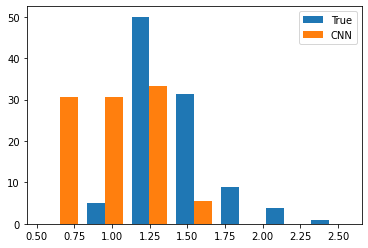

In [45]:
A = plt.hist(X,weights=wts,bins=7)
plt.legend(['True','CNN'])

In [46]:
print('ImgJ:','media=',np.mean(np.array(Diam1)),'desvio=',np.std(np.array(Diam1)),'pontos=',len(Diam1))

ImgJ: media= 1.4365604096576146 desvio= 0.2749068872026991 pontos= 102


In [47]:
print('Software:','media=',np.mean(np.array(Diameter_All)),'desvio=',np.std(np.array(Diameter_All)),'pontos=',len(Diameter_All))

Software: media= 0.9786977358577291 desvio= 0.24869837536147496 pontos= 72


In [48]:
# Software: media= 1.3185563233999378 desvio= 0.2728642468732428 pontos= 66 theshold =0.8 e repete=80
# Software: media= 1.2650227960747715 desvio= 0.22942393421076387 pontos= 20 theshold =0.5 e repete=40

In [49]:
np.mean(np.array(Diameter_All))

0.9786977358577291

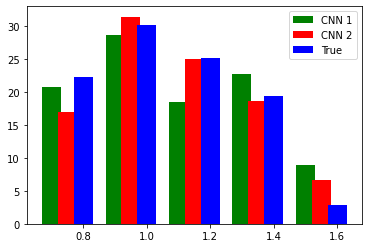

In [50]:
# Freq1 = [19.12043703, 29.22484843, 19.35872174, 20.82190224, 11.47409056] # avarage 4 samples
Freq1 = [20.69301557, 28.55598044, 18.50768331, 22.7106327, 8.905907357] # avarage 10 samples
#Freq2 = [16.93792791, 31.38008965, 24.93810752, 18.56158392, 6.233810752, 0.4]
Freq2 = [16.93792791, 31.38008965, 24.93810752, 18.56158392, 6.633810752]
Freq3 = [22.22489, 30.15078, 25.10463, 19.30926, 2.810434]
barWidth = 0.25

br1 = range(len(Freq1))
# Set position of bar on X axis
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
# labels = [0.8, 1.0, 1.2, 1.4, 1.6, 1.8]
labels = [0.8, 1.0, 1.2, 1.4, 1.6]

xx=[]
for a in labels:
  xx.append(str(a))
plt.bar(br1, Freq1 , color="green", align="center", width=0.3, tick_label= xx) 
plt.bar(br2, Freq2 , color="red", align="center", width=0.3, tick_label= xx)
plt.bar(br3, Freq3 , color="blue", align="center", width=0.3, tick_label= xx)
plt.legend(['CNN 1','CNN 2','True'])